In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mode

In [2]:
df = pd.read_csv('data.csv')
df

,x,y,class
0,2,4,negative
1,4,2,negative
2,4,4,positive
3,4,6,negative
4,6,2,positive
5,6,4,negative


In [3]:
colors = ['red' if label=='negative' else 'green' for label in df['class']]
colors

['red', 'red', 'green', 'red', 'green', 'red']

Text(0, 0.5, 'y')

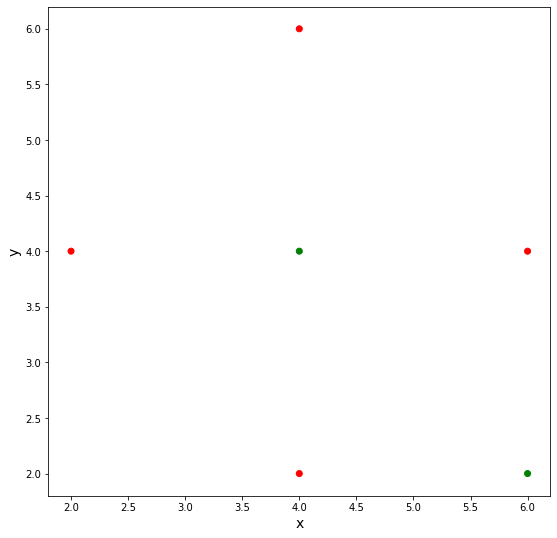

In [4]:
fig = plt.figure(figsize=(9,9))
ax = plt.axes()
ax.scatter(x=df['x'], y=df['y'], c=colors)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)

In [5]:
X = df[['x','y']]
X

,x,y
0,2,4
1,4,2
2,4,4
3,4,6
4,6,2
5,6,4


In [6]:
Y = df['class']
Y

0    negative
1    negative
2    positive
3    negative
4    positive
5    negative
Name: class, dtype: object

In [7]:
x = np.array(X)
y = np.array(Y)

In [8]:
class KNearestNeighbor:
    def __init__(self, neighbors=2):
        self.neighbors = neighbors
        
        self.x = None
        self.y = None
        self.num_features = 0
    
    @staticmethod
    def euclidean_distance(p1, p2):
        sq_diff = 0
        for x1,x2 in zip(p1, p2):
            sq_diff += (x1-x2)**2
        
        return math.sqrt(sq_diff)
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        
        num_samples, num_features = np.shape(x)
        self.num_features = num_features
    
    def predict(self, x_test):
        num_samples, num_features = np.shape(x_test)
        if num_features != self.num_features:
            raise Exception(f'dimension mismatch, requires: (n,{self.num_features})')
        
        predictions = []
        for row in x_test:
            distances = [KNearestNeighbor.euclidean_distance(xi, row) for xi in self.x]
            k_indices = np.argsort(distances)[:self.neighbors]
            classes = [y[index] for index in k_indices]
            predictions.append(mode(classes))
        
        return predictions

In [9]:
knn = KNearestNeighbor()
knn.fit(x,y)

In [10]:
knn.predict([[6,6]])

['negative']